# ML Foundation project

Your client for this project is an Abalone Producing and Processing company.

They want to supply the highest quality of abalones with a good price through direct transactions with fish farms.
They have experience in exporting abalones to North America as well as South East Asia.
To find the highest quality abalones, they need to analyze their measurements.
One of the key measurements in this process is the age of the abalone.

## Current Scenario

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

By adding 1.5 to the number of rings, we get the abalone’s age in years.


The current process suffers from the following problems:

Since the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
This becomes a quite boring and time-consuming task.

The company has hired you as data science consultants. They want to automate the process of predicting the age of abalone from other physical measurements rather than doing this manual work.

## Your Role 

You are given a dataset containing the physical measurements of abalones.
Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

## Project Deliverables

* Deliverable: Predict the number of rings for each abalone.
* Machine Learning Task: Regression
* Target Variable: Rings
* Win Condition: N/A (best possible model)

## Evaluation Metric

The model evaluation will be based on the RMSE score.


In [28]:
# 1. Import required libraries
import pandas as pd   #read, DataFrames
import numpy as np    #array and math operations

from sklearn.model_selection import train_test_split   #splitting data
from sklearn.metrics.regression import mean_squared_error #error metrics

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visua|lisation
%matplotlib inline  

## 1. Importing data

In [29]:
abalone_train = pd.read_csv('abalone_train.csv')  
abalone_train.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


## 2. Analyse 

In [30]:
#Finding datatype and null values

abalone_train.info()

#no null fields found in dataset
#There is one categorical (Sex) and eight continuous variables in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


In [31]:
#checking spread of data, skewness and min/max  
abalone_train.describe()


,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [33]:
#checking the categorical variable to see the variance in data 

abalone_train.groupby('Sex')["Rings"].sum()

#three types of data is available in the column 'Sex'. We need to do OHE of the data. 

Sex
F    11743
I     8299
M    13229
Name: Rings, dtype: int64

## 3. Visualisation 

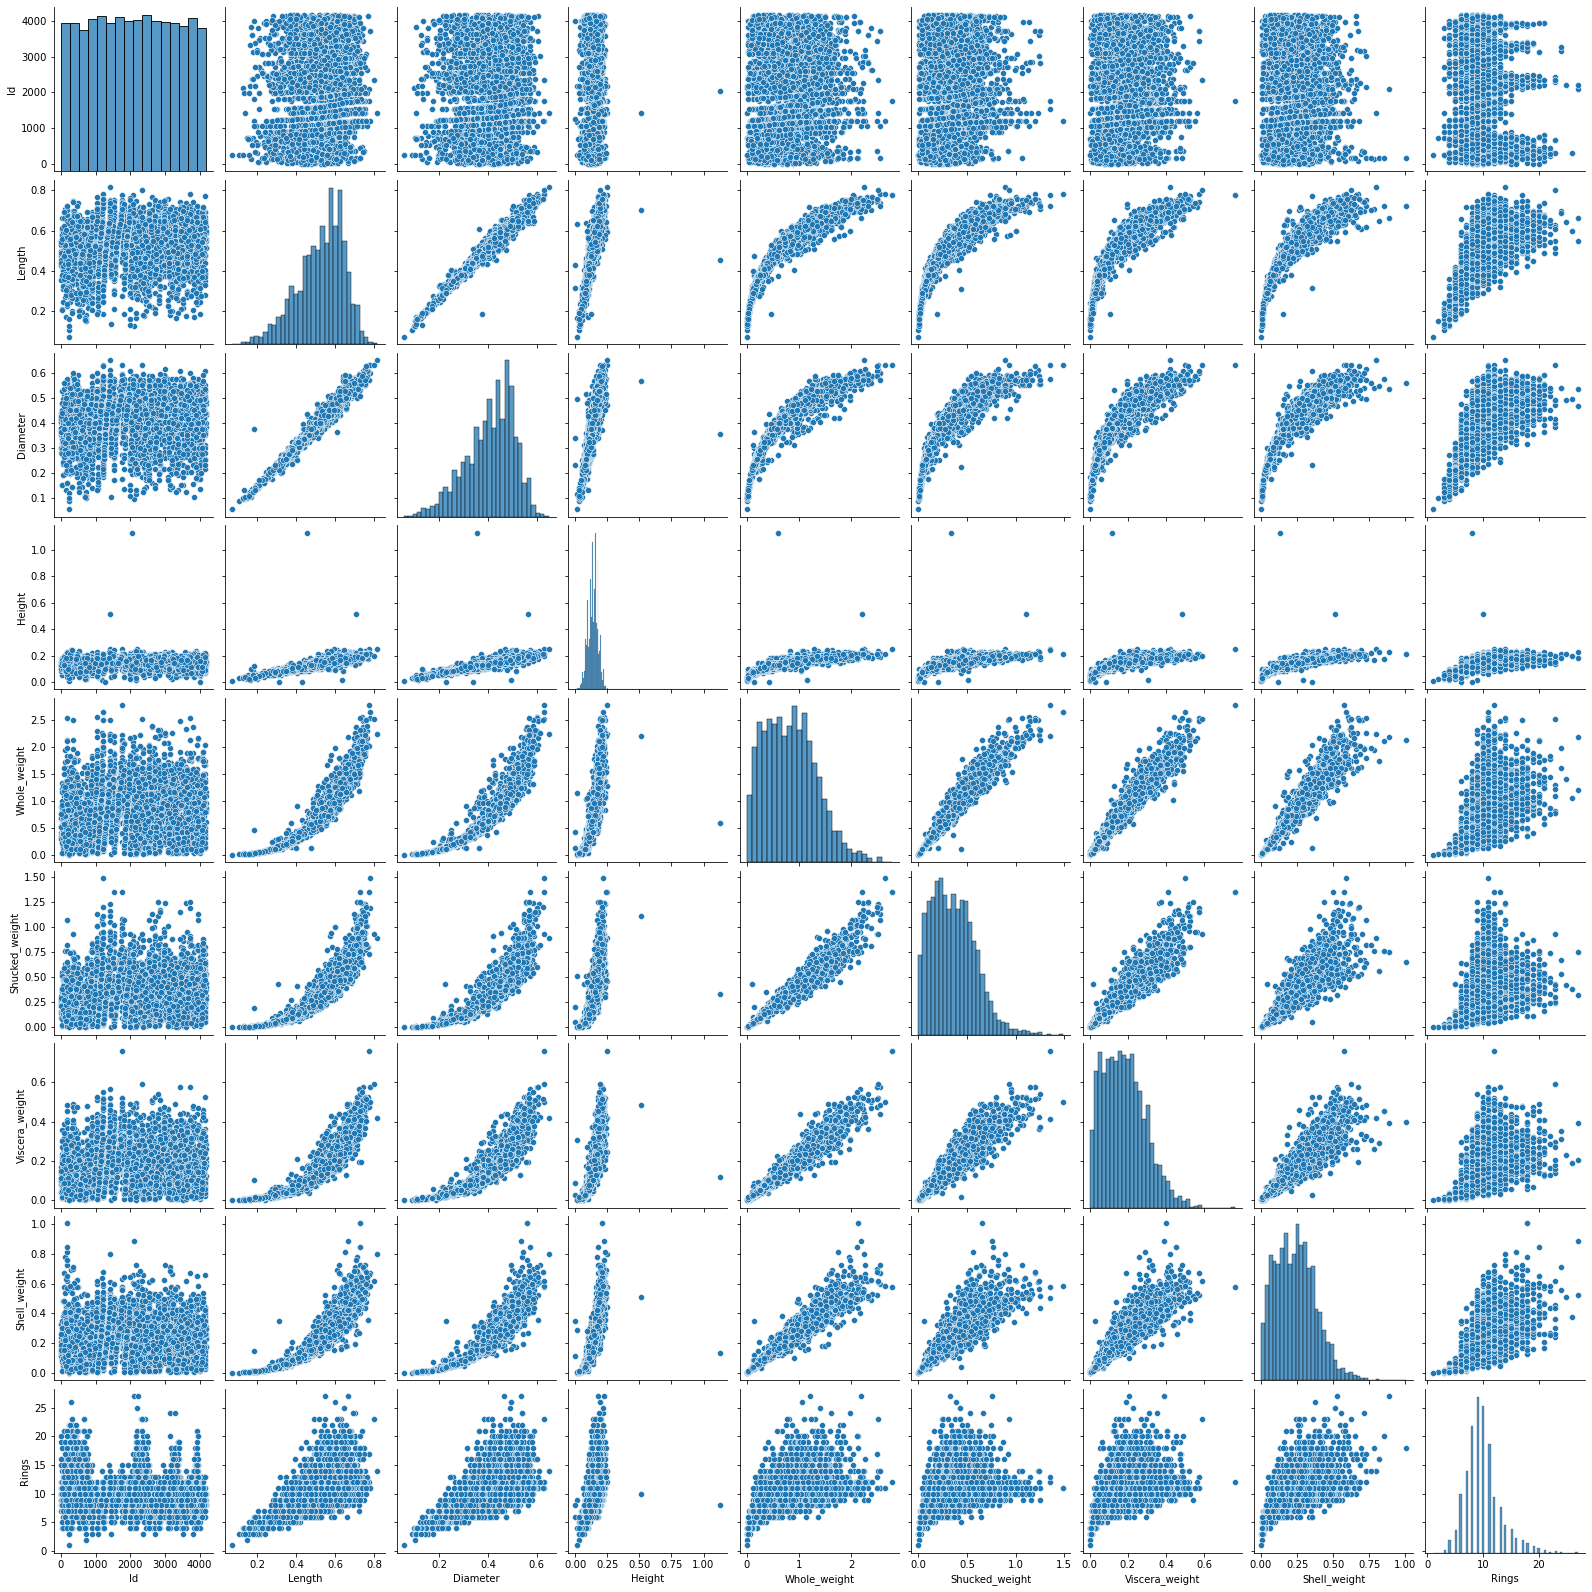

In [34]:
#Uni and bivariate analysis using pair plot
sns.pairplot(abalone_train)



<AxesSubplot:>

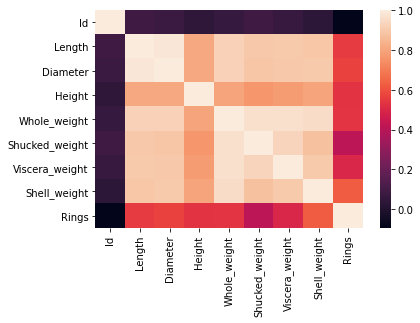

In [35]:
#Check the corrleation between independent variables
sns.heatmap(data = abalone_train.corr())

#Lenght and Diameter seem very closely correleated so we should drop one of these columns to avoide collenearity
#Shucked_weight, Viscera_weight, Shell_weight and Whole_weight also seem very closely correleated so we should drop one of these columns to avoide collenearity


In [36]:
#correlation in numbers 

abalone_train.corr()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Id,1.000000,0.086245,0.073384,0.039486,0.063036,0.089253,0.064792,0.036367,-0.093840
Length,0.086245,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926
Diameter,0.073384,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614
Height,0.039486,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590
Whole_weight,0.063036,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350
Shucked_weight,0.089253,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353
Viscera_weight,0.064792,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502
Shell_weight,0.036367,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154
Rings,-0.093840,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000


# 4. Preparing data for model training

In [37]:
#One hot encoding of categorical variable

abalone_train = pd.get_dummies(abalone_train, columns=['Sex'])
abalone_train.head()


,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,0,1,0
1,3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,0,1,0
2,883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,0,1
3,3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,0,1
4,2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,0,1


In [38]:
#dropping the highly correlated variables as Linear Regression has this assumption that independent variables don't have collenairty 

abalone_train = abalone_train.drop(['Id', 'Length', 'Whole_weight', 'Viscera_weight','Shucked_weight'], axis=1)
abalone_train.head()


,Diameter,Height,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.135,0.080,0.0100,5,0,1,0
1,0.150,0.055,0.0125,3,0,1,0
2,0.530,0.170,0.4530,15,0,0,1
3,0.525,0.200,0.4305,10,0,0,1
4,0.455,0.155,0.3650,14,0,0,1


# 5. Standardise the data

In [39]:
# standardization of dependent variables
abalone_train_dependent = abalone_train[['Diameter', 'Height','Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M']]

#Importing library
from sklearn.preprocessing import StandardScaler


sc = StandardScaler() #creating object
abalone_train_std = sc.fit_transform(abalone_train_dependent) #fitting and transforming data before using it in the model
abalone_train_std = pd.DataFrame(abalone_train_std, columns=['Diameter', 'Height','Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M'])
abalone_train_std 

,Diameter,Height,Shell_weight,Sex_F,Sex_I,Sex_M
0,-2.775722,-1.410927,-1.655032,-0.680753,1.476102,-0.764306
1,-2.624022,-1.997555,-1.637150,-0.680753,1.476102,-0.764306
2,1.219028,0.700934,1.513622,-0.680753,-0.677460,1.308377
3,1.168462,1.404887,1.352685,-0.680753,-0.677460,1.308377
4,0.460532,0.348957,0.884183,-0.680753,-0.677460,1.308377
...,...,...,...,...,...,...
3336,1.168462,1.052910,1.685287,-0.680753,-0.677460,1.308377
3337,0.915630,-0.003020,0.311965,1.468961,-0.677460,-0.764306
3338,0.409965,0.114306,0.086655,-0.680753,-0.677460,1.308377
3339,0.814497,0.583608,0.551581,1.468961,-0.677460,-0.764306


# 6. Test and Train Split

In [40]:
#creating arrays of train and test data for the model
X = abalone_train_std 
y = abalone_train['Rings']


In [41]:
#split the data 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [42]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672 entries, 407 to 2617
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Diameter      2672 non-null   float64
 1   Height        2672 non-null   float64
 2   Shell_weight  2672 non-null   float64
 3   Sex_F         2672 non-null   float64
 4   Sex_I         2672 non-null   float64
 5   Sex_M         2672 non-null   float64
dtypes: float64(6)
memory usage: 146.1 KB


# 7. Model training

In [43]:
from sklearn.linear_model import LinearRegression

# initialize the model
model1 = LinearRegression()

# fit the model
model1.fit(X_train, y_train) 

LinearRegression()

In [44]:
#Checking the models intercept and coefficients

print('Intercept:',model1.intercept_)
print('Coefficients:',model1.coef_)

Intercept: 9.93359815230879
Coefficients: [-0.17514483  0.2189419   1.71434307  0.15268442 -0.29885188  0.14041495]


In [45]:
pd.DataFrame(model1.coef_.flatten(), X_train.columns, columns=['Coefficient'])

,Coefficient
Diameter,-0.175145
Height,0.218942
Shell_weight,1.714343
Sex_F,0.152684
Sex_I,-0.298852
Sex_M,0.140415


# 8. Prediction

In [46]:
#predicted value for train data set

y_pred_train = model1.predict(X_train)
pred_train= pd.DataFrame(y_pred_train)
pred_train.columns = ['Rings']
pred_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rings   2672 non-null   float64
dtypes: float64(1)
memory usage: 21.0 KB


In [47]:
#predicted value for test data set

y_pred_test = model1.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
pred_test.columns=['Rings']
pred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rings   669 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [ ]:
#plotting train acutal vs target variable values

sns.regplot(y_test, y_pred_test)
plt.xlabel('Actual values')
plt.ylabel('predicted values')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predicted values')

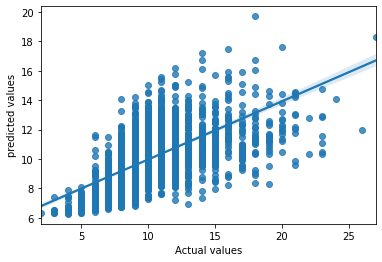

In [49]:
#plotting test acutal vs target variable values

sns.regplot(y_train, y_pred_train)
plt.xlabel('Actual values')
plt.ylabel('predicted values')

# 9. Evaluation

In [50]:
 from sklearn.metrics import mean_squared_error

RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 2.4660218753174674
RMSE for test set is 2.4931736267044475


# 10. Future data prediction

In [51]:
#importing future data 

abalone_test = pd.read_csv('abalone_test.csv')  

#dropping data which was found collenear or not adding any value

abalone_test_clean = abalone_test.drop(['Id', 'Length', 'Whole_weight', 'Viscera_weight','Shucked_weight'], axis=1)

#One Hot Encoding of categorical variablein the dataset
abalone_test_final = pd.get_dummies(abalone_test_clean, columns=['Sex'])

abalone_test_final

,Diameter,Height,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.425,0.155,0.3350,0,0,1
1,0.400,0.120,0.1935,0,1,0
2,0.480,0.155,0.3175,0,0,1
3,0.165,0.055,0.0200,0,1,0
4,0.500,0.175,0.3775,0,0,1
...,...,...,...,...,...,...
831,0.475,0.140,0.3500,1,0,0
832,0.325,0.120,0.1250,0,0,1
833,0.345,0.105,0.1170,0,1,0
834,0.435,0.180,0.3250,0,0,1


In [52]:
#predict number of rings using the model1

rings_pred = model1.predict(abalone_test_final)
rings_pred

array([10.60781747,  9.92268675, 10.5681835 ,  9.65217604, 10.67192003,
       10.63226558, 10.24248008, 10.31555886,  9.79705359, 10.62962521,
        9.81335476,  9.66862585, 10.22427734, 10.33220867,  9.68070024,
       10.53571673, 10.17930891, 10.63440877, 10.64933866,  9.79870841,
        9.73245376,  9.69845988,  9.85205348, 10.16637542, 10.03669079,
       10.47770928, 10.07220256, 10.75156663,  9.96740467, 10.50893078,
       10.17622543,  9.62667945, 10.54009556, 11.00947736,  9.75532297,
       10.30536579,  9.84813525, 10.50870858,  9.81576294, 10.68969607,
       10.47461111, 10.33105659, 10.47067002, 10.48230688, 10.61023521,
       10.28690844, 10.43811241, 10.67817075, 10.09888243,  9.76949402,
       10.57551016,  9.74532989, 10.26335837, 10.76890471, 10.35154152,
       10.25510012, 10.10037834, 10.15764208,  9.75444702,  9.72607125,
       10.48483743, 10.4193474 , 10.45833932,  9.8192993 ,  9.75922651,
       10.79445845, 10.77663994, 10.70520516,  9.93213441, 10.97

In [53]:
#adding the predicted number of rings to the dataset

abalone_test['rings_pred'] = rings_pred.tolist()

#converting the predicted value from float to integer

abalone_test['Rings'] = abalone_test['rings_pred'].astype(int)
abalone_test

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,rings_pred,Rings
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,10.607817,10
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,9.922687,9
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,10.568183,10
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,9.652176,9
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,10.671920,10
...,...,...,...,...,...,...,...,...,...,...,...
831,575,F,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500,10.633761,10
832,3231,M,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250,10.257657,10
833,1084,I,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170,9.797888,9
834,290,M,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250,10.594396,10


# 11. Submission CSV with predicted Rings

In [54]:
#dataset with ID and Rings variable
abalone_test_sub = abalone_test[['Id', 'Rings']]
abalone_test_sub.set_index('Id')
#exporting the CSV
abalone_test_sub.to_csv('rings_pred_submission.csv',header=False, index=False)